# South African Language Identification

 ### Loading Libraries & Dependencies

In [1]:
import numpy as np        # Fundamental package for linear algebra and multidimensional arrays
import pandas as pd       # Data analysis and manipulation tool

import requests
import io

# Importing modules for data science and visualization
import pandas as pd
import numpy as np
import time
import timeit
import seaborn as sns
import pickle
import matplotlib.pyplot as plt
import matplotlib as mpl

# Quality of all figures in notebook
mpl.rcParams['figure.dpi'] = 180

# NLP Libraries
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.tokenize import RegexpTokenizer
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.stem import SnowballStemmer
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from collections import Counter

# ML Libraries
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk import pos_tag

# Model Evaluation Packages
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix, classification_report, f1_score
from sklearn.metrics import make_scorer
from sklearn.datasets import make_classification
from sklearn.metrics import f1_score

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Modelling
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB, ComplementNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.pipeline import Pipeline
from sklearn.decomposition import LatentDirichletAllocation as LDA
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

In [2]:
#download libraries
nltk.download('stopwords')
nltk.download('wordnet')
stop_words = set(stopwords.words('english'))
sns.set_style('whitegrid')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Twala\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Twala\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


 ### Dataset Collection

In [3]:
train_set = pd.read_csv('train_set.csv')
train_set.head(9)

,lang_id,text
0,xho,umgaqo-siseko wenza amalungiselelo kumaziko ax...
1,xho,i-dha iya kuba nobulumko bokubeka umsebenzi na...
2,eng,the province of kwazulu-natal department of tr...
3,nso,o netefatša gore o ba file dilo ka moka tše le...
4,ven,khomishini ya ndinganyiso ya mbeu yo ewa maana...
5,nso,dinyakišišo tše tša go dirwa gabedi ka ngwaga ...
6,tsn,kgetse nngwe le nngwe e e sa faposiwang mo tsh...
7,ven,mbadelo dze dza laelwa dzi do kwama mahatulele...
8,nso,maloko a dikhuduthamaga a ikarabela mongwe le ...


In [4]:
test_set = pd.read_csv('test_set.csv')
test_set.head(11)

,index,text
0,1,"Mmasepala, fa maemo a a kgethegileng a letlele..."
1,2,Uzakwaziswa ngokufaneleko nakungafuneka eminye...
2,3,Tshivhumbeo tshi fana na ngano dza vhathu.
3,4,Kube inja nelikati betingevakala kutsi titsini...
4,5,Winste op buitelandse valuta.
5,6,"Ke feela dilense tše hlakilego, tša pono e tee..."
6,7,<fn>(762010101403 AM) 1495 Final Gems Birthing...
7,8,Ntjhafatso ya konteraka ya mosebetsi: Etsa bon...
8,9,u-GEMS uhlinzeka ngezinzuzo zemithi yezifo ezi...
9,10,"So, on occasion, are statistics misused."


### Basic Exploratory Data Analysis 

 ### Summary Statistics

In [5]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33000 entries, 0 to 32999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   lang_id  33000 non-null  object
 1   text     33000 non-null  object
dtypes: object(2)
memory usage: 515.8+ KB


In [9]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5682 entries, 0 to 5681
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   index   5682 non-null   int64 
 1   text    5682 non-null   object
dtypes: int64(1), object(1)
memory usage: 88.9+ KB


In [10]:
print('There are', len(train_set), 'rows and',train_set.shape[1], 'columns in the train set.')
print('There are', len(test_set), 'rows and',test_set.shape[1], 'columns in the train set.')

There are 33000 rows and 2 columns in the train set.
There are 5682 rows and 2 columns in the train set.


**Missing values**

In [11]:
train_set.isnull().sum()

lang_id    0
text       0
dtype: int64

In [12]:
test_set.isnull().sum()

index    0
text     0
dtype: int64

In [13]:
# Sample text
text = train_set.iloc[4,1]
print(text)

khomishini ya ndinganyiso ya mbeu yo ewa maana u ya nga mulayo wa khomishini ya ndinganyiso ya mbeu u thetshelesa mbilaelo dzine dza tshimbilelana na tshialula u ya nga mbeu nahone i ivhea sa foramu ya thungo u ya nga mulayo wa ndinganyiso


In [14]:
train_set.lang_id.describe()

count     33000
unique       11
top         ven
freq       3000
Name: lang_id, dtype: object

In [15]:
train_set.groupby('lang_id').describe()

text                                                               
        count unique                                                top freq
lang_id                                                                     
afr      3000   2641  die beskerming van suid-afrika se omgewing en ...    5
eng      3000   2998  the state revenue account is hereby charged wi...    2
nbl      3000   2362  ngokwesekhtjheni yomthetho ophathelene nalokhu...   17
nso      3000   2873  sebopego se se phethagetšego sa sengwalwana bo...    4
sot      3000   2833  tip-offs anonymous ke tshebeletso ya mohala wa...    6
ssw      3000   2426  lesifo sisabalala ngematfonsi ematse k k uma n...    5
tsn      3000   2869  diforomo tsa kopo di ka tsewa gongwe go isiwa ...    9
tso      3000   2758  ku ya hi xiyenge xa xa nawu u ni mfanelo yo ko...   10
ven      3000   2605  vhabebi vhanu vha tea u ṋekana nga vhuṱanzi ha...    8
xho      3000   2659  ukuthintelwa kweempawu ezibonisa ukungalungi k...    6
zul      3000   2924  i-tip-offs anonymous wusizo locingo oluzimele ...    5

### Data Visualisation

- Common spoken words in South Africa

Text(0.5, 1.0, 'Train : Most Frequently Occuring Words - Top 30')

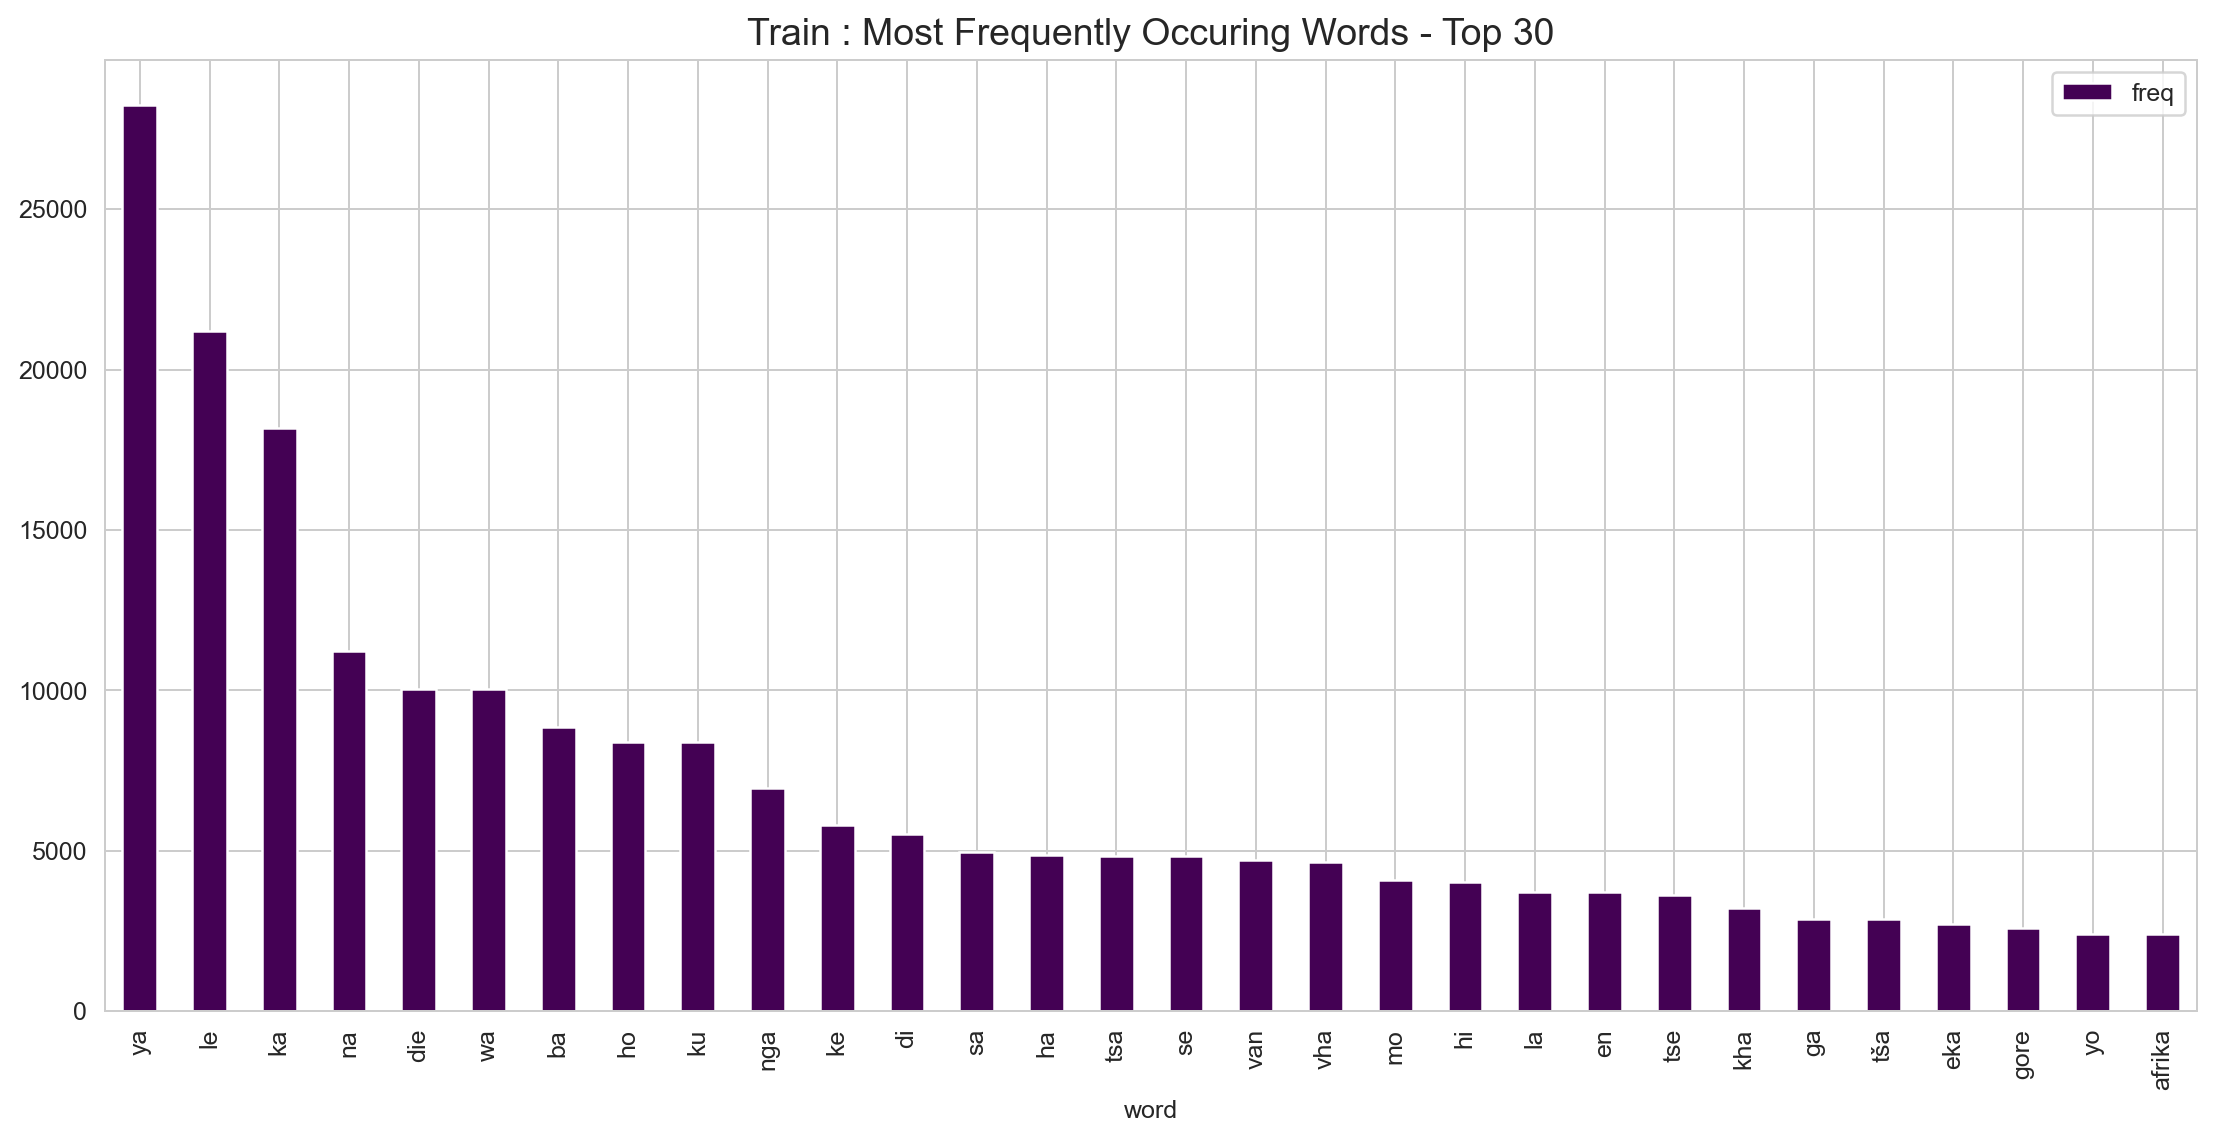

In [16]:
#convert the test to numerical values 
cv = CountVectorizer(stop_words = 'english')
words = cv.fit_transform(train_set.text)

sum_words = words.sum(axis=0)
#create a frequency of most occuring words
words_freq = [(word, sum_words[0, i]) for word, i in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)
#create a dataframe of the words and frequency 
frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])

frequency.head(30).plot(x='word', y='freq', kind='bar', figsize=(15, 7), color = '#440154')
plt.title("Train : Most Frequently Occuring Words - Top 30",size=15)

In [17]:
words_freq

[('ya', 28245),
 ('le', 21204),
 ('ka', 18190),
 ('na', 11218),
 ('die', 10059),
 ('wa', 10052),
 ('ba', 8849),
 ('ho', 8399),
 ('ku', 8386),
 ('nga', 6947),
 ('ke', 5805),
 ('di', 5519),
 ('sa', 4975),
 ('ha', 4861),
 ('tsa', 4830),
 ('se', 4825),
 ('van', 4723),
 ('vha', 4659),
 ('mo', 4098),
 ('hi', 4019),
 ('la', 3727),
 ('en', 3715),
 ('tse', 3636),
 ('kha', 3215),
 ('ga', 2888),
 ('tša', 2870),
 ('eka', 2711),
 ('gore', 2599),
 ('yo', 2412),
 ('afrika', 2404),
 ('tla', 2330),
 ('kanye', 2252),
 ('va', 2250),
 ('te', 2109),
 ('xa', 2038),
 ('ta', 1985),
 ('ukuba', 1947),
 ('wat', 1933),
 ('bona', 1926),
 ('noma', 1899),
 ('word', 1871),
 ('mme', 1776),
 ('kana', 1736),
 ('om', 1729),
 ('ye', 1676),
 ('hore', 1620),
 ('dza', 1596),
 ('tshi', 1541),
 ('nie', 1518),
 ('fa', 1496),
 ('swi', 1491),
 ('uma', 1473),
 ('ri', 1467),
 ('uri', 1456),
 ('bo', 1435),
 ('molao', 1413),
 ('zwa', 1400),
 ('kapa', 1388),
 ('kumbe', 1368),
 ('kutsi', 1333),
 ('ge', 1328),
 ('vir', 1315),
 ('okanye'

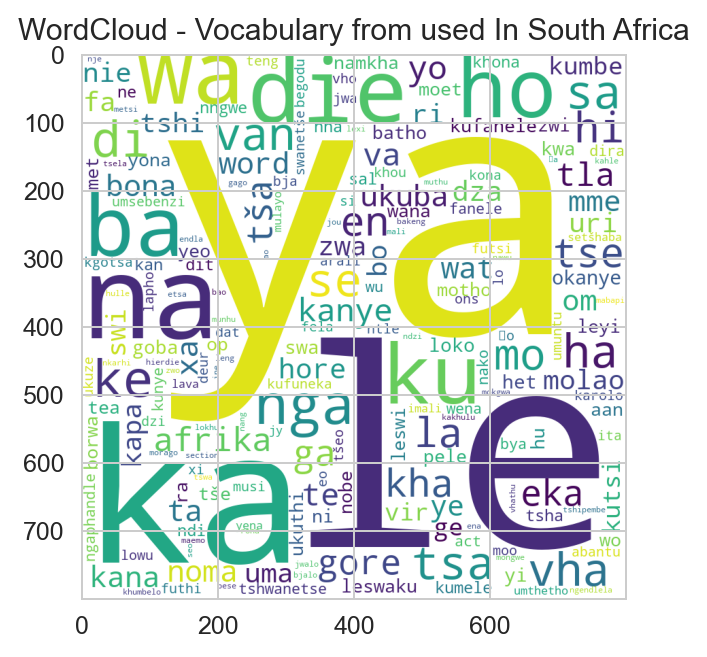

In [18]:
#creating a word cloud from the data
wordcloud = WordCloud(background_color = 'white', 
                      width = 800, height = 800).generate_from_frequencies(dict(words_freq))

plt.figure(figsize=(4,4))
plt.title("WordCloud - Vocabulary from used In South Africa")
plt.imshow(wordcloud)

## Data Preprocessing

## Data Cleaning 

In [19]:
working_df = train_set.copy()

In [ ]:
#remove rows that are not SA lang
#working_df= working_df.set_index("lang_id")
#working_df = working_df.drop(['today', 'put', 'friend','will'])

**Removing noise**

In [20]:
def cleaner(working_df):
    """
    this function takes in a dataframe and perform the following:
    -Convert letters to lowercases
    -remove URL links
    -remove # from hashtags
    -remove numbers
    -remove punctuation
    from the text field then return a clean dataframe 
    """
    working_df = working_df.lower()
    to_del = [
        r"@[\w]*",  # strip account mentions
        r"http(s?):\/\/.*\/\w*",  # strip URLs
        r"#\w*",  # strip hashtags
        r"\d+",  # delete numeric values
        r"U+FFFD",  # remove the "character note present" diamond
    ]
    for key in to_del:
        working_df = re.sub(key, "", working_df)
    
    # strip punctuation and special characters
    working_df = re.sub(r"[,.;':@#?!\&/$]+\ *", " ", working_df)
    # strip excess white-space
    working_df = re.sub(r"\s\s+", " ", working_df)
    
    return working_df.lstrip(" ")

In [21]:
working_df['text'] = working_df['text'].apply(cleaner)
test_set['text'] = test_set['text'].apply(cleaner)

In [22]:
working_df.shape

(33000, 2)

In [23]:
test_set.shape

(5682, 2)

In [24]:
working_df.head()

,lang_id,text
0,xho,umgaqo-siseko wenza amalungiselelo kumaziko ax...
1,xho,i-dha iya kuba nobulumko bokubeka umsebenzi na...
2,eng,the province of kwazulu-natal department of tr...
3,nso,o netefatša gore o ba file dilo ka moka tše le...
4,ven,khomishini ya ndinganyiso ya mbeu yo ewa maana...


**Removing Stop Words**

In [25]:
stop_word = stopwords.words('english')
working_df['text'] = working_df['text'].apply(lambda x: ' '.join([word for word in x.split() 
                                                                    if word not in (stop_word)]))

**Tokenisation**

In [28]:
from nltk import TreebankWordTokenizer
tokeniser = TreebankWordTokenizer()

tokeniser = TreebankWordTokenizer()
working_df['tokens'] = working_df['text'].apply(tokeniser.tokenize)
test_set['tokens'] = test_set['text'].apply(tokeniser.tokenize)

**Stemming**

In [29]:
def stem_text(data):
    text = TreebankWordTokenizer().tokenize(data)
    return ''.join([SnowballStemmer('english').stem(word) for word in data])
working_df['text'] = working_df['text'].apply(lambda x: stem_text(x))
test_set['text'] = test_set['text'].apply(lambda x: stem_text(x))

### Splitting the Data

**Text Feature Extraction**

In [30]:
y = working_df['lang_id']
X = working_df['text']
# split into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)
print("X shape : ", X.shape)
print("y shape : ", y.shape)

X shape :  (33000,)
y shape :  (33000,)


### Building Model

**Build Pipeline**

In [31]:
from sklearn.pipeline import Pipeline

# Create pipeline for Logistic Regression:
LR = Pipeline([('tfidf', TfidfVectorizer()),('lr', LogisticRegression(random_state=5,
                                  multi_class='ovr',
                                  n_jobs=1, C=1)),])

# Create pipeline for Linear_SVC:
Linear_SVC= Pipeline([('tfidf', TfidfVectorizer()),('linear_svc', LinearSVC(random_state=42)),])


# Create pipeline for RandomForestClassifier:
RF_clf= Pipeline([('tfidf', TfidfVectorizer()),('rf_clf', RandomForestClassifier(n_estimators=100, max_depth=1,
                                     random_state=0, class_weight="balanced")),])

# Create pipeline for KNeighborsClassifier:
K_Near_clf= Pipeline([('tfidf', TfidfVectorizer()),('k_near_clf', KNeighborsClassifier()),])


### Training Model

**1.Logistic Regression Model**

In [32]:
# Model Generation Using Logitic Regression
LR.fit(X_train, y_train)
pred_lr = LR.predict(X_test)

print("Logistic Regression Testing Accuracy Score: ", accuracy_score(y_test, pred_lr))
print("Logistic Regression Training Accuracy Score: ",LR.score(X_train, y_train))
        

Logistic Regression Testing Accuracy Score:  0.9940909090909091
Logistic Regression Training Accuracy Score:  0.9990151515151515


 **2. Linear SVC Model**

In [33]:
# Model Generation Using Linear SVC Classifier
Linear_SVC.fit(X_train, y_train)
pred_Linear_SVC = Linear_SVC.predict(X_test)

print("Linear SVC Testing Accuracy Score: ", accuracy_score(y_test, pred_Linear_SVC))
print("Linear SVC Testing Accuracy Score: ",Linear_SVC.score(X_train, y_train))


Linear SVC Testing Accuracy Score:  0.9975757575757576
Linear SVC Testing Accuracy Score:  1.0


**3. Random Forest Classifier**

In [34]:
# Model Generation Using Linear Random Forest Classifier
RF_clf.fit(X_train, y_train)
pred_RF_clf = RF_clf.predict(X_test)

print("Random Forest Testing Accuracy Score: ", accuracy_score(y_test, pred_RF_clf))
print("Random Forest Regression Training Accuracy Score: ",RF_clf.score(X_train, y_train))


Random Forest Testing Accuracy Score:  0.628030303030303
Random Forest Regression Training Accuracy Score:  0.63


**4.  KNeighbors Classifier**

In [35]:
K_Near_clf.fit(X_train, y_train)
pred_K_Near_clf = K_Near_clf.predict(X_test)

print("KNeighbor Testing Accuracy Score: ", accuracy_score(y_test, pred_K_Near_clf))
print("KNeighbor Training Accuracy Score: ",K_Near_clf.score(X_train, y_train))

KNeighbor Testing Accuracy Score:  0.9586363636363636
KNeighbor Training Accuracy Score:  0.9774621212121212


# Load Test Data

In [ ]:
test_data = test_set.copy()

# Printing out the first 5 rows of the dataframe

print (test_data.head())


In [ ]:
target =  Linear_SVC.predict(test_data['text'])

In [ ]:
t_dict= {'index' : test_data['index'], 'lang_id': target}

In [ ]:
output = pd.DataFrame(t_dict)

# Save prediciton results

In [ ]:
output.to_csv('submission.cvs', index= False)